In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import Series

## Evolution of the number of let's plays videos

In [2]:
community_num=[9,22,85,76,71,37,87]
color_num=['darkorchid', 'deepskyblue', 'limegreen', 'orange','dimgray', 'steelblue', 'hotpink']
labels=['Comedy/fun', 'Walkthrough/fun', 'Competitive/special', 'Russian','Competitive/shooting','LOL/esports', 'Music/kids']
data_islp='/media/aruiz/data/videos_data/islp/'
ln=0
lst=[]

for ind in range (0, len(community_num)):
    f=os.path.join(data_islp,'data_community_'+str(community_num[ind])+'_islp.csv')
    df=pd.read_csv(f)
    df=df.fillna(0.0)

    for dyear in range (2007,2017):
        dft=df[df['year']==dyear]
        total=len(dft)+1
        dft=dft[dft['categoryId']==20]
        perc1=(len(dft)*100)/total
        dft=dft[dft['is_letPlay']==True]
        perc2=(len(dft)*100)/total
        
        dct={'color':color_num[ind],'x':dyear,'y':perc2, 'y2':perc1}
        lst.append(dct)
        ln+=1

/home/aruiz/.virtualenvs/LetsPlayData/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# 1015 LP videos from 2007 to 2009 mostly in community 9 and 22
# 4285 LP in community 9 in 2010
# dft['ratio']=dft[likeCount[4000:4132]]

## Percentage LPs from the total gaming videos per year

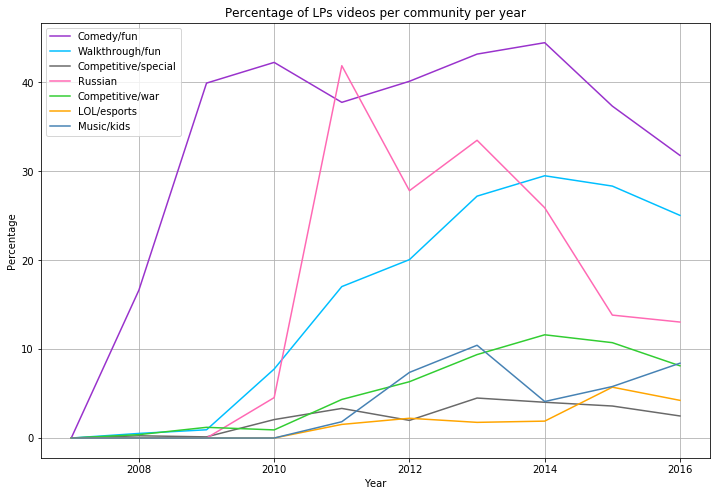

In [4]:
df2=pd.DataFrame(lst)
fig, ax = plt.subplots(figsize=(12, 8))
i=0

for key, grp in df2.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=labels[i], grid=True)
    i+=1
    
plt.legend(loc='best')
plt.title('Percentage of LPs videos per community per year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()
# df2.plot()

## Percentage of gaming videos from total  videos per year

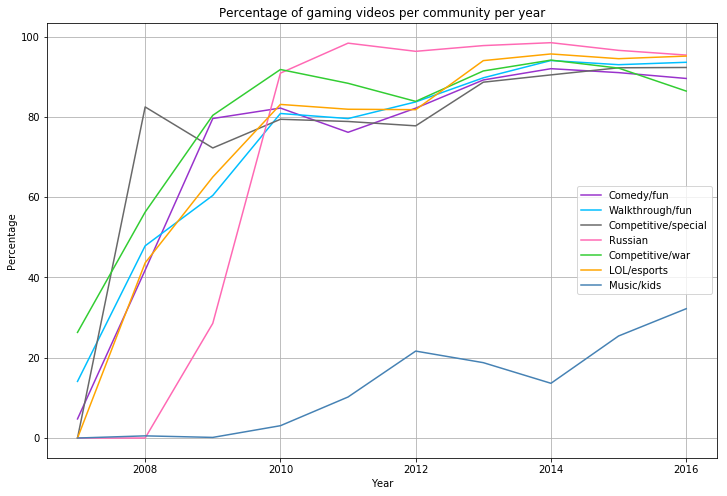

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
i=0

for key, grp in df2.groupby(['color']):
    ax = grp.plot(ax=ax, kind='line', x='x', y='y2', c=key, label=labels[i], grid=True)
    i+=1

plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of gaming videos per community per year')
plt.show()

## Statistics approval per community per year

In [7]:
community_num=[9,22,85,76,71,37,87]
color_num=['darkorchid', 'deepskyblue', 'limegreen', 'orange','dimgray', 'steelblue', 'hotpink']
data_islp='/media/aruiz/data/videos_data/islp/'
ln=0
tupP=()
tupN=()

for ind in range (0, len(community_num)):
# for ind in range (5,6):
    f=os.path.join(data_islp,'data_community_'+str(community_num[ind])+'_islp.csv')
    df=pd.read_csv(f)
    df=df.fillna(0.0)
    df=df[df['is_letPlay']==True]
    df=df[df['categoryId']==20] 

    for dyear in range (2010,2017):
#     for dyear in range (2011,2012):
        dft=df[df['year']==dyear]
        dft['ratio']= dft['likeCount']-dft['dislikeCount']
        dft=dft.sort_values(by=['ratio'],ascending=False)
        dft=dft.reset_index(drop=True)
        total=len(dft)
        dft2=dft[dft['ratio']>0]
        if total>0:
            pos=(len(dft2)*100)/total
#         pos=len(dft2)
        else:
            pos=0
        tupP=tupP+(pos,)
        dft3=dft[dft['ratio']<=0]
        if total>0:
            neg=(len(dft3)*100)/total
#         neg=len(dft2)
        else:
            neg=0
        tupN=tupN+(neg,)

/home/aruiz/.virtualenvs/LetsPlayData/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/aruiz/.virtualenvs/LetsPlayData/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


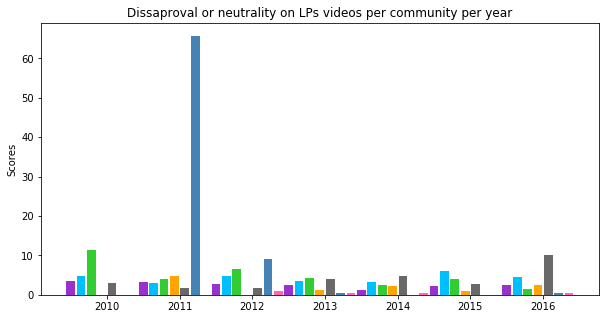

In [10]:
N = 49
ntupP=()
ntupN=()
xtick=()
colors=['darkorchid', 'deepskyblue', 'limegreen', 'orange','dimgray', 'steelblue', 'hotpink']
color_list=[]
years=('2010','2011','2012','2013','2014','2015','2016')
indy=np.arange(1.75,24,3.5) 

for n in range(0,7):
    list1=np.arange(n,49,7)
    j=0
    for i in list1:
        ntupP=ntupP+(tupP[i],)
        ntupN=ntupN+(tupN[i],)
        color_list.append(colors[j])
        j+=1
        
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
ind = np.arange(0,24.5,0.5)   # the x locations for the groups
width = 0.42       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, menMeans, width, yerr=menStd)
# p2 = plt.bar(ind, womenMeans, width, bottom=menMeans, yerr=womenStd)

f, ax = plt.subplots(figsize=(10,5)) 
p1 = plt.bar(ind, ntupN, width, color=color_list)
# p2 = plt.bar(ind, ntupN, width, bottom=ntupP)

plt.ylabel('Scores')
plt.title('Dissaproval or neutrality on LPs videos per community per year')
plt.xticks(indy, years)
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Approval', 'Disapproval'))

plt.show()

## Other fan production per community per year